# Imports

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# To test functions manually implemented
from sklearn.metrics import mean_squared_error

# Utility Functions

In [6]:
def head(numpy_array):
    return numpy_array[:5, :]

# Question 1

In [7]:
data = np.genfromtxt('./artificial1d.csv', delimiter=',')
head(data)

array([[-1.        , -2.08201726],
       [-0.93103448, -1.32698023],
       [-0.86206897, -1.10559772],
       [-0.79310345, -0.87394576],
       [-0.72413793, -0.28502695]])

In [20]:
# Including column with 1 to X data (intercept)
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
print('First values of X data')
display(head(X))
y = data[:,[1]]
print('\nFirst values of y data')
display(head(y))

First values of X data


array([[ 1.        , -1.        ],
       [ 1.        , -0.93103448],
       [ 1.        , -0.86206897],
       [ 1.        , -0.79310345],
       [ 1.        , -0.72413793]])


First values of y data


array([[-2.08201726],
       [-1.32698023],
       [-1.10559772],
       [-0.87394576],
       [-0.28502695]])

## Item a) 
Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
a reta resultante sobre os dados

In [61]:
def linear_regression_ols(X, y):
    w_hat = (np.linalg.inv(X.T @ X) @ X.T) @ y
    return w_hat.ravel()

In [62]:
def get_mse(y_real, y_pred):
    return np.mean((y_real - y_pred) ** 2)

def get_rmse(y_real, y_pred):
    return np.sqrt(get_mse(y_real, y_pred))

In [353]:
X = np.hstack([np.ones((len(data), 1)), data[:,[0]]])
y = data[:,[1]]

In [354]:
w = linear_regression_ols(X, y)

print('Coeficients of Linear Regression Using OLS Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))


Coeficients of Linear Regression Using OLS Method:
Intercept:	0.067618
X(1):    	1.574865

#--- Metrics ---#
MSE: 0.21340090132936987
RMSE: 0.46195335406225796


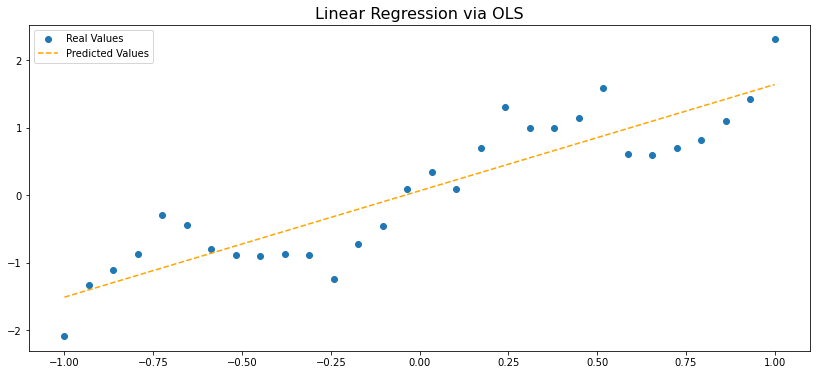

In [356]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via OLS', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item b) 
Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados

In [401]:
def standardize_data(data):
    
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    norm_data = (data - mean) / std

    return norm_data, mean, std

def inverse_standardize_data(norm_data, mean, std):

    original_data = (norm_data.ravel() * std) + mean

    return original_data

In [402]:
def linear_regression_gd(X, y, alfa=0.1, n_iterations=1000):

    np.random.seed(123142)
    w = np.random.uniform(0, 10, 2)

    count = 0
    learning_curve = []
    while count < n_iterations:
        e = (y.ravel() - X @ w) @ X
        w = w + (1/len(y)) * alfa * e

        y_pred = (X @ w)
        learning_curve.append(get_mse(y, y_pred))

        count+=1

    # print(w * X_std + X_mean)
    return np.array(w), learning_curve

X = np.hstack([np.ones((data.shape[0], 1)), data[:, [0]]])
y = data[:, [1]]
w, learning_curve = linear_regression_gd(X, y, n_iterations=200)


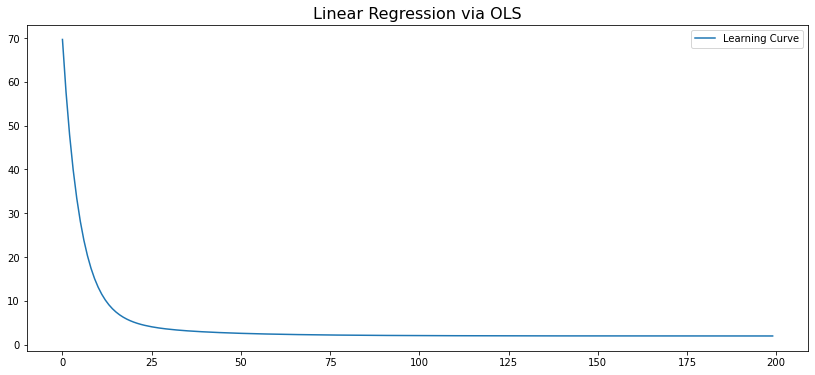

In [403]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via OLS', fontsize=16)
# plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(learning_curve, label='Learning Curve')
# plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

In [404]:
print('Coeficients of Linear Regression Using Gradient Descent Method:')
for i in range(len(w)):
    if i == 0:
        print('Intercept:\t{:.6f}'.format(w[i]))
    else:
        print('X({}):    \t{:.6f}'.format(i, w[i]))

y_pred = (X @ w).reshape(-1, 1)

print('\n#--- Metrics ---#')
print('MSE:', get_mse(y, y_pred))
print('RMSE:', get_rmse(y, y_pred))

Coeficients of Linear Regression Using Gradient Descent Method:
Intercept:	0.067618
X(1):    	1.576966

#--- Metrics ---#
MSE: 0.21340247414512706
RMSE: 0.4619550564125552


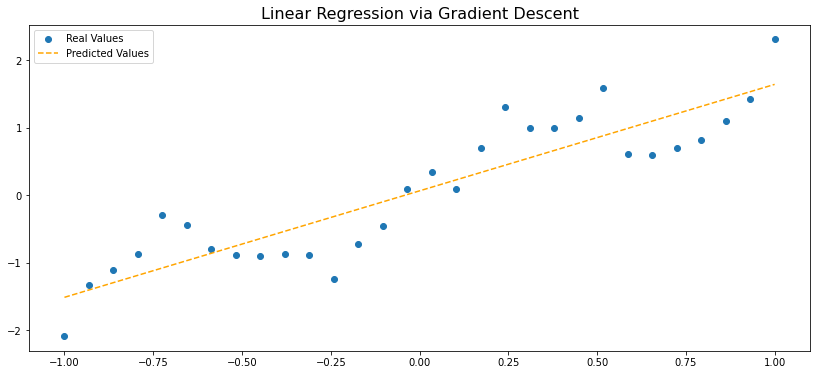

In [405]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear Regression via Gradient Descent', fontsize=16)
plt.scatter(X[:, 1], y, label = 'Real Values')
plt.plot(X[:, 1], y_pred, c='orange', linestyle='--', label = 'Predicted Values')
plt.legend()
plt.show()

## Item c) 
Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem
obtidos pelo algoritmo SGD (gradiente descendente estocástico).
Plote a reta resultante sobre os dados.

In [ ]:
## TODO